<a href="https://colab.research.google.com/github/llucasreis/boston_linear_regression/blob/main/statsmodels_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2 - Regressão Simples

**Aluno**: Lucas Pereira Reis (lpr.cid20@uea.edu.br)

In [ ]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Para identificar qual variável tem com a variável `target`, criou-se um *heatmap* da correlação de Pearson.

A variável que mais apresenta correlação positiva é a `RM`, e a que mais apresentação negativa é a `LSTAT`. Para esta atividade, utilizou-se a `LSTAT` para calcular a regressão linear entre as duas.

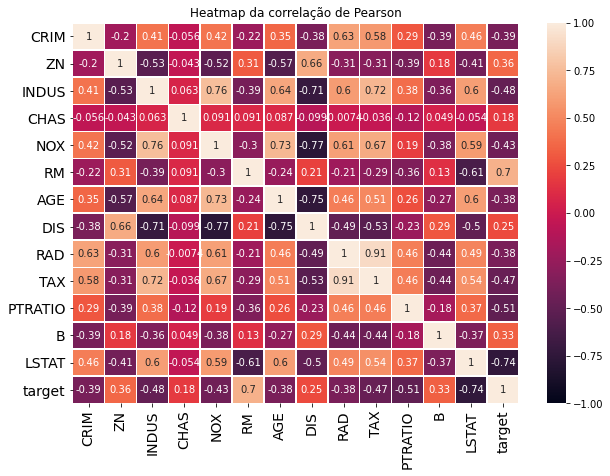

In [ ]:
plt.figure(figsize = (10, 7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1,linewidths=.5, annot=True)
plt.title('Heatmap da correlação de Pearson')
plt.show()

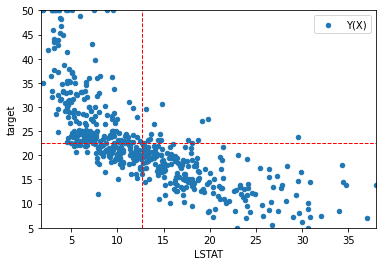

In [ ]:
# Definindo o range dos valores de x e y
x_range = [df['LSTAT'].min(),df['LSTAT'].max()]
y_range = [df['target'].min(),df['target'].max()]

# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = 'LSTAT', y = 'target', xlim = x_range, ylim = y_range, label = 'Y(X)')

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['LSTAT'].mean(), df['LSTAT'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com StatsModels

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = df['target'].values
X = df['LSTAT'].values
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y, X)

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        13:43:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [ ]:
coef_linear, coef_angular = results.params

Geração da reta com base nos dados de predição

In [ ]:
reta = coef_angular*X + coef_linear

In [ ]:
X = X[:, 1]
reta = reta[:, 1]

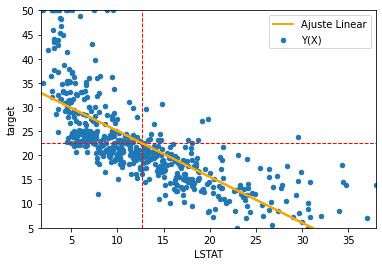

In [ ]:
x_range = [df['LSTAT'].min(), df['LSTAT'].max()]
y_range = [df['target'].min(), df['target'].max()]

# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = 'LSTAT', y = 'target', xlim = x_range, ylim = y_range, label = 'Y(X)')

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['LSTAT'].mean(),df['LSTAT'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df['LSTAT'], reta, '-', color = 'orange', linewidth = 2, label = 'Ajuste Linear')
plt.legend();

## Avaliando o modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y, reta)
rmse = np.sqrt(mean_squared_error(Y, reta))

print("MAE = {:0.3f}".format(mae))
print("RMSE = {:0.3f}".format(rmse))

MAE = 4.505
RMSE = 6.203
